# 4-1. 이진 분류 : IMDB 영화 리뷰

In [12]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) # 가장 자주 나타나는 단어 1만개만 포함

# 최대 9만개 가까이 등장하는데, 대부분의 단어는 1번만 등장 -> 분류에 의미 없는 경우가 많다

In [13]:
print(train_data[0]) # 각 리뷰는 단어 인덱스의 리스트
train_labels[0] # 부정 : 0, 긍정 : 1

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

In [14]:
# 리뷰 -> 텍스트 디코딩 : 넘겨도 무방한 파트
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # 0 : 패딩, 1 : 문서 시작, 2 : 사전에 없음이라 3을 빼준다
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [15]:
len(train_data)

25000

In [19]:
# 2. 데이터 준비
# 리스트 -> 동일한 길이의 텐서로 변환 : 멀티 핫 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) # 크기가 시퀀스 길이, 차원이면서 모든 원소가 0 인 행렬
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1. # 특정 인덱스의 위치만 1로 만듦
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [32]:
# 3. 신경망 모델 만들기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

# 손실함수, 옵티마이저 선택
# 이진 분류니까 binary_crossentropy / mean_squared_error도 가능(회귀에 많이 쓰긴 하지만, 여기서도 사용 가능)
# 확률 출력은 crossentropy을 쓰는 게 최선이다.
# 옵티마이저 : rmsprop -> 거의 모든 문제에 기본으로 사용하기 좋다
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [33]:
# 4. 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 훈련
history = model.fit(partial_x_train, partial_y_train, epochs = 4, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/4
30/30 [==============================] - 4s 91ms/step - loss: 0.5267 - accuracy: 0.7728 - val_loss: 0.3962 - val_accuracy: 0.8622
Epoch 2/4
30/30 [==============================] - 2s 58ms/step - loss: 0.3237 - accuracy: 0.8899 - val_loss: 0.3121 - val_accuracy: 0.8839
Epoch 3/4
30/30 [==============================] - 4s 121ms/step - loss: 0.2424 - accuracy: 0.9139 - val_loss: 0.2946 - val_accuracy: 0.8833
Epoch 4/4
30/30 [==============================] - 3s 109ms/step - loss: 0.1949 - accuracy: 0.9331 - val_loss: 0.2823 - val_accuracy: 0.8850


In [34]:
# history 속성 확인
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

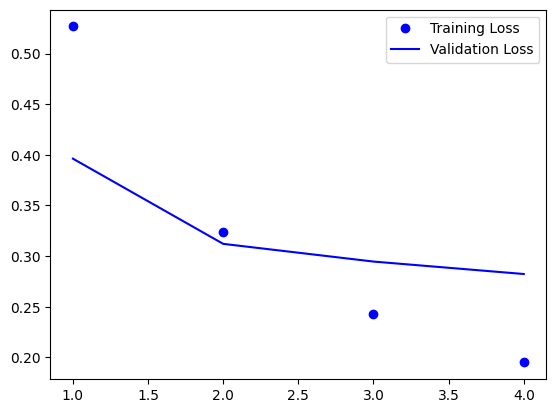

In [35]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.legend()
plt.show()

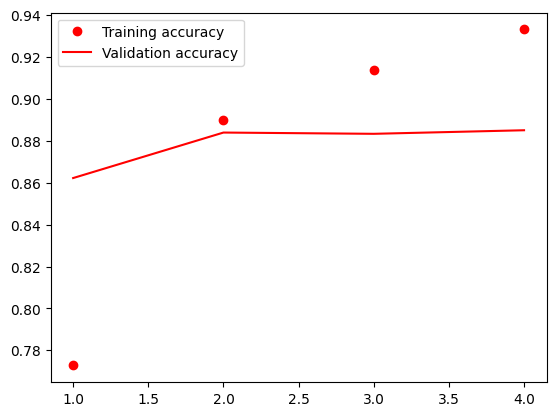

In [36]:
# 훈련과 검증 정확도 그리기
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, "ro", label = "Training accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation accuracy")
plt.legend()
plt.show()

In [37]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.21865924],
       [0.9973579 ],
       [0.9029522 ],
       ...,
       [0.08617474],
       [0.15235853],
       [0.54572684]], dtype=float32)